# Project Template and Guidance

This Notebook is intended to provide some guidance for getting started with creating your first complete project workflow.

## Using Google Drive

Start by saving this Notebook to your Google Drive account. Then go to your Google Drive, click on the Colab Notebooks folder to find
You'll have to log into Google Drive this way if you want to load your dataset or save save your work as a new dataset.

In [1]:
# Mount your Google Drive. It will prompt you to log into your Google account.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Change the working directory to your project folder.
import os
drive_path = '/content/drive/MyDrive/Colab Notebooks/'
project_folder = 'Econ_0150_Project/'
os.chdir(drive_path + project_folder)

## Step 0 | Imports and Setup

In [3]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [4]:
# Open a dataset from your project folder in Google Drive
dataLE = pd.read_csv('Life_expectancy.csv')

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# Open a dataset from your project folder in Google Drive
dataHE = pd.read_csv('health_expenditure.csv')

## Step 1 | Data Preparation

Turn your data into something you can explore through data operations.

In [7]:
#Filter for 2022
Life = dataLE[["REF_AREA_LABEL", "2022"]]
Life

,REF_AREA_LABEL,2022
0,Aruba,76.226000
1,Africa Eastern and Southern,64.487020
2,Afghanistan,65.617000
3,Africa Western and Central,57.987813
4,Angola,64.246000
...,...,...
260,Kosovo,77.623000
261,"Yemen, Rep.",67.952000
262,South Africa,65.454000
263,Zambia,65.279000


In [8]:
#Filter for 2022
Health = dataHE[["REF_AREA_LABEL", "2022"]]
Health

,REF_AREA_LABEL,2022
0,Africa Eastern and Southern,228.081066
1,Afghanistan,383.107288
2,Africa Western and Central,200.892067
3,Angola,216.919254
4,Albania,1186.215336
...,...,...
235,Samoa,396.379804
236,"Yemen, Rep.",109.288548
237,South Africa,1340.742287
238,Zambia,207.551913


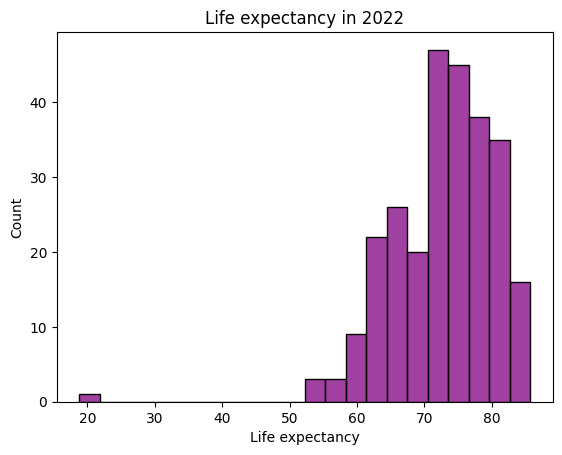

In [9]:
# Clean Life
life_expectancy_2022_values = Life["2022"].dropna()
sns.histplot(x=life_expectancy_2022_values, color='purple')
plt.xlabel("Life expectancy")
plt.ylabel("Count")
plt.title("Life expectancy in 2022")
plt.show()

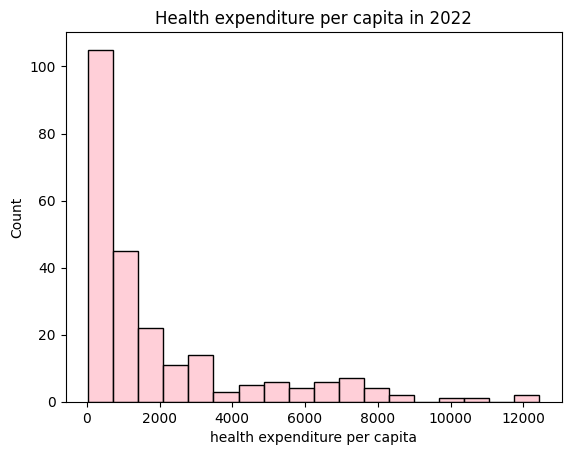

In [10]:
# Clean health
health_2022_values = Health["2022"].dropna()
sns.histplot(x=health_2022_values, color= 'pink')
plt.xlabel("health expenditure per capita")
plt.ylabel("Count")
plt.title("Health expenditure per capita in 2022")
plt.show()

In [11]:
# Merged the data sets
merged = pd.merge(Life, Health, on="REF_AREA_LABEL").dropna()
merged.head()

,REF_AREA_LABEL,2022_x,2022_y
0,Africa Eastern and Southern,64.487020,228.081066
1,Afghanistan,65.617000,383.107288
2,Africa Western and Central,57.987813,200.892067
3,Angola,64.246000,216.919254
4,Albania,78.769000,1186.215336


In [12]:
# Rename coulmns
merged.rename(columns={'2022_y': 'Health_Expenditure_per_Capita'}, inplace=True)
merged.rename(columns={'2022_x': 'Life_Expectancy'}, inplace=True)
merged.head()

,REF_AREA_LABEL,Life_Expectancy,Health_Expenditure_per_Capita
0,Africa Eastern and Southern,64.487020,228.081066
1,Afghanistan,65.617000,383.107288
2,Africa Western and Central,57.987813,200.892067
3,Angola,64.246000,216.919254
4,Albania,78.769000,1186.215336


In [13]:
# Cleaning
merged = merged.dropna(subset=["Life_Expectancy", "Health_Expenditure_per_Capita"])

Text(0.5, 1.0, 'Health Expenditure vs Life Expectancy')

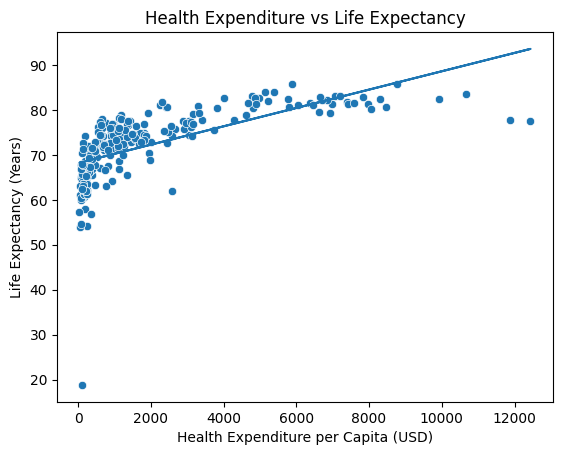

In [14]:
# Normal graph
x = merged["Health_Expenditure_per_Capita"]
y = merged["Life_Expectancy"]
m, b = np.polyfit(x, y, 1)
sns.scatterplot(x=x, y=y)
plt.plot(x, m*x + b)
plt.xlabel("Health Expenditure per Capita (USD)")
plt.ylabel("Life Expectancy (Years)")
plt.title("Health Expenditure vs Life Expectancy")


In [15]:
merged['log_value'] = np.log(merged['Health_Expenditure_per_Capita'])

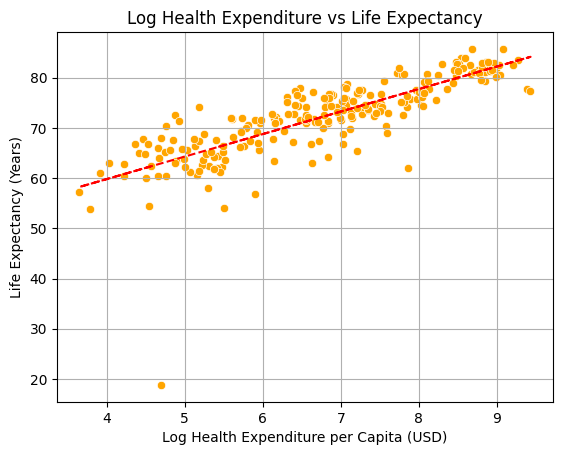

In [16]:
# Graph with log tranformation on Health
x = merged["log_value"]
y = merged["Life_Expectancy"]
sns.scatterplot(x=x, y=y, color = 'orange')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red', linestyle='--')
plt.grid(True)
plt.xlabel("Log Health Expenditure per Capita (USD)")
plt.ylabel("Life Expectancy (Years)")
plt.title("Log Health Expenditure vs Life Expectancy")
plt.show()

In [17]:
# Normal Regression
model = smf.ols('Life_Expectancy ~ Health_Expenditure_per_Capita', data=merged).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     174.8
Date:                Thu, 11 Dec 2025   Prob (F-statistic):           3.10e-30
Time:                        15:14:31   Log-Likelihood:                -756.90
No. Observations:                 238   AIC:                             1518.
Df Residuals:                     236   BIC:                             1525.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

Life expectancy = Beta_0 + Beta_1 * Health Expenditure + error

In [18]:
# Log Regression
model = smf.ols('Life_Expectancy ~ log_value', data=merged).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     432.9
Date:                Thu, 11 Dec 2025   Prob (F-statistic):           2.64e-55
Time:                        15:14:36   Log-Likelihood:                -698.90
No. Observations:                 238   AIC:                             1402.
Df Residuals:                     236   BIC:                             1409.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.8716      1.484     28.208      0.0

<Axes: ylabel='Count'>

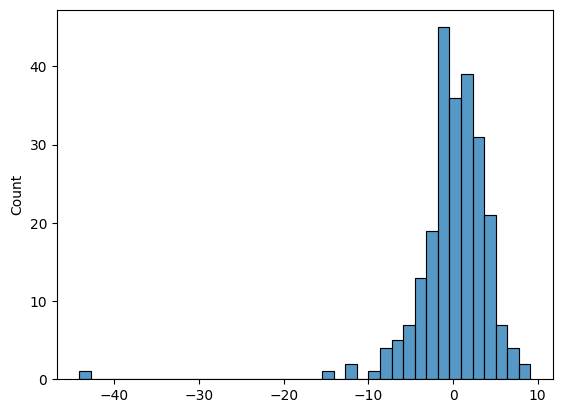

In [19]:
#Calculate residuals
residuals = model.resid
sns.histplot(residuals)

<Axes: ylabel='Count'>

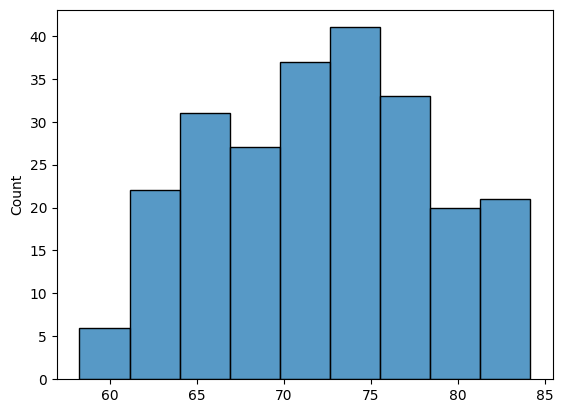

In [20]:
#Calculate predictions
predictions = model.predict()
sns.histplot(predictions)

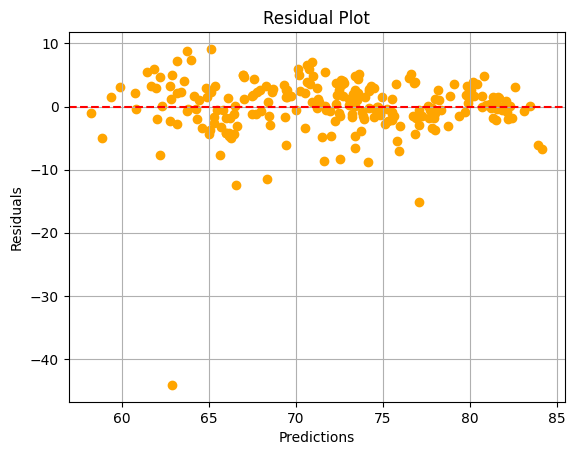

In [21]:
#Residual Plot
plt.scatter(predictions, residuals, color = 'orange')
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')
plt.grid(True)
plt.show()

In [22]:
dataDI = pd.read_csv('dem_index.csv')
dataDI.head()

,Entity,Code,Year,Democracy index,World regions according to OWID
0,Afghanistan,AFG,2006,3.06,NaN
1,Afghanistan,AFG,2008,3.02,NaN
2,Afghanistan,AFG,2010,2.48,NaN
3,Afghanistan,AFG,2011,2.48,NaN
4,Afghanistan,AFG,2012,2.48,NaN


In [23]:
#Filter for 2022
Dem_index = dataDI[dataDI['Year'] == 2022]
Dem_index.rename(columns={'Entity': 'REF_AREA_LABEL'}, inplace=True)
Demindex = Dem_index[["REF_AREA_LABEL", "Democracy index"]]
Demindex


/tmp/ipython-input-211349123.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dem_index.rename(columns={'Entity': 'REF_AREA_LABEL'}, inplace=True)


,REF_AREA_LABEL,Democracy index
14,Afghanistan,0.320000
31,Africa,4.075000
48,Africa (population-weighted),3.921042
66,Albania,6.410000
83,Algeria,3.660000
...,...,...
3108,World,5.293174
3125,World (population-weighted),4.984464
3142,Yemen,1.950000
3162,Zambia,5.800000


In [24]:
merged2 = pd.merge(merged, Demindex, on="REF_AREA_LABEL").dropna()
merged2.head()

,REF_AREA_LABEL,Life_Expectancy,Health_Expenditure_per_Capita,log_value,Democracy index
0,Afghanistan,65.617,383.107288,5.948315,0.32
1,Angola,64.246,216.919254,5.379525,3.96
2,Albania,78.769,1186.215336,7.078523,6.41
3,United Arab Emirates,80.487,3813.761871,8.246371,2.90
4,Argentina,75.806,2664.352656,7.887716,6.85


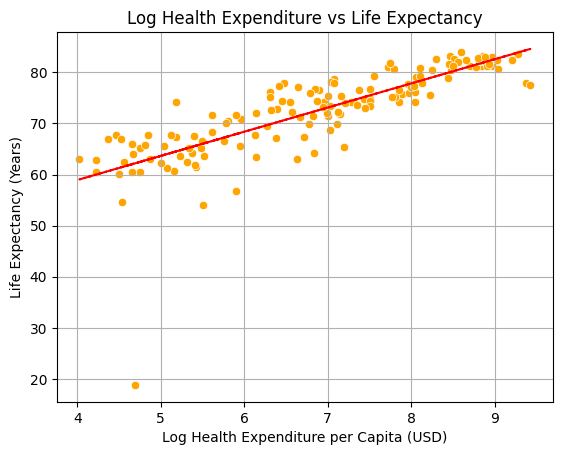

In [25]:
x = merged2["log_value"]
y = merged2["Life_Expectancy"]
sns.scatterplot(x=x, y=y, color = 'orange')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red', linestyle='--')
plt.grid(True)
plt.xlabel("Log Health Expenditure per Capita (USD)")
plt.ylabel("Life Expectancy (Years)")
plt.title("Log Health Expenditure vs Life Expectancy")
plt.show()

In [26]:
merged2.rename(columns={'Democracy index': 'Democracy_index'}, inplace=True)
model = smf.ols(formula="Life_Expectancy ~ log_value + Democracy_index",data=merged2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     131.2
Date:                Thu, 11 Dec 2025   Prob (F-statistic):           3.60e-33
Time:                        15:14:59   Log-Likelihood:                -445.08
No. Observations:                 147   AIC:                             896.2
Df Residuals:                     144   BIC:                             905.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          40.3997      2.111     

<Axes: ylabel='Count'>

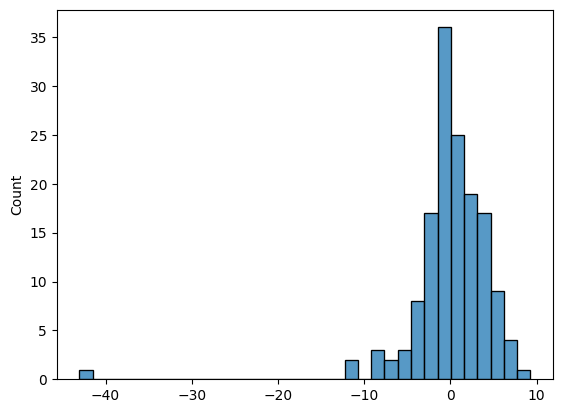

In [27]:
#Calculate residuals
residuals = model.resid
sns.histplot(residuals)

<Axes: ylabel='Count'>

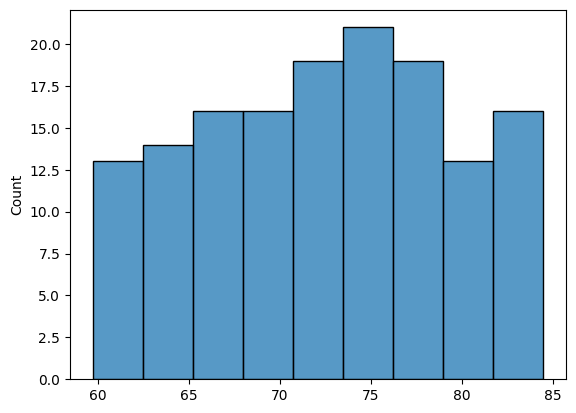

In [28]:
#Calculate predictions
predictions = model.predict()
sns.histplot(predictions)

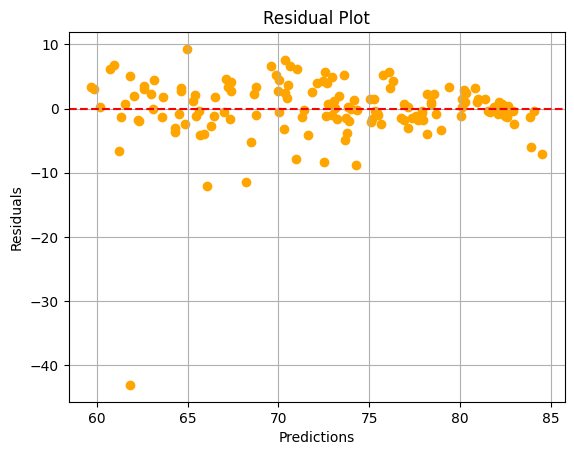

In [29]:
#Residual Plot
plt.scatter(predictions, residuals, color = 'orange')
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')
plt.grid(True)
plt.show()